<a href="https://colab.research.google.com/github/nsanced/predicciones-ventas/blob/main/predicciones_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montar Google Drive y cargar datos
Se monta Google Drive utilizando la biblioteca google.colab y se carga un conjunto de datos de ventas desde un archivo CSV.

In [103]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
filename = "/content/drive/MyDrive/Fondo Talento Digital - Es Hoy/Proyeto 1 - Predicción de ventas/sales_predictions.csv"
df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploración inicial de datos
Se realizan 3 operaciones para obtener un visión inicial de los datos.
1. Se utiliza **'df.head(10)'** para mostrar las primeras 10 filas del DataFrame.
2. **'df.info()'** ofrece información sobre el DataFrame, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos.
3. **'df.describe()'** genera estadísticas descriptivas como la media y los valores máximos y mínimos para cada columna numérica en el DataFrame.

In [104]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Basándonos en la salida de **'df.info()'**, podemos resaltar lo siguiente:


1.   El DataFrame tiene 8523 registros y 12 columnas.
2.   Las columnas "Item_Weight" y "Outlet_Size" contienen valores faltantes que pueden requerir tratamiento.
3. Existen vatriables categóricas y numéricas. Puede necesitarse hacer transformaciones en los tipos de datos.
4. Puede ser útil verificar los valores únicos en cada columna para comprender la diversidad de categorías en cada una.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [106]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Tratamiento de datos faltantes de la columna "Outlet_Size"

**Opción 1: Imputación con el valor más común**

Rellenar los valores faltantes con el valor más común de esa columna.
Esta opción no es tan buena porque las cantidades de las categorías "Medium" y "Small" no son tan distintas.

In [107]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**Opción 2: Utilizar información de otras columnas relacionadas a la tienda**

Utilizaremos el tipo de tienda para relacionarlo con el su tamaño.

In [108]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [109]:
df.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

Podemos recuperar 555 datos al indicar que todos los Grocery Stores son de tamaño Small.

In [110]:
df1 = df
null_filter = df1["Outlet_Size"].isna()
grocery_filter = df1["Outlet_Type"] == "Grocery Store"
df1.loc[null_filter & grocery_filter, "Outlet_Size"] = "Small"

Utilizaremos el tipo de ubicación para relacionarlo con el tamaño de una tienda.

In [111]:
df["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [112]:
df1.groupby("Outlet_Location_Type")["Outlet_Size"].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
                      Small           555
Name: count, dtype: int64

Recuperamos los datos faltantes en la columna "Outlet_Size". Así, hemos completado toda la columna.

In [113]:
tier2_filter = df1["Outlet_Location_Type"] == "Tier 2"
df1.loc[null_filter & tier2_filter, "Outlet_Size"] = "Small"

# Tratamiento de datos faltantes de la columna "Item_Weight"

Creamos un diccionario con los 1559 items únicos que existen y sus respectivos pesos. Luego asignaremos esos pesos en donde falte.

In [114]:
item_peso = df1.groupby(["Item_Identifier"])[["Item_Weight"]].mean().round(3)
item_peso = item_peso.to_dict()['Item_Weight']
print(item_peso)

{'DRA12': 11.6, 'DRA24': 19.35, 'DRA59': 8.27, 'DRB01': 7.39, 'DRB13': 6.115, 'DRB24': 8.785, 'DRB25': 12.3, 'DRB48': 16.75, 'DRC01': 5.92, 'DRC12': 17.85, 'DRC13': 8.26, 'DRC24': 17.85, 'DRC25': 5.73, 'DRC27': 13.8, 'DRC36': 13.0, 'DRC49': 8.67, 'DRD01': 12.1, 'DRD12': 6.96, 'DRD13': 15.0, 'DRD15': 10.6, 'DRD24': 13.85, 'DRD25': 6.135, 'DRD27': 18.75, 'DRD37': 9.8, 'DRD49': 9.895, 'DRD60': 15.7, 'DRE01': 10.1, 'DRE03': 19.6, 'DRE12': 4.59, 'DRE13': 6.28, 'DRE15': 13.35, 'DRE25': 15.35, 'DRE27': 11.85, 'DRE37': 13.5, 'DRE48': 8.43, 'DRE49': 20.75, 'DRE60': 9.395, 'DRF01': 5.655, 'DRF03': 19.1, 'DRF13': 12.1, 'DRF15': 18.35, 'DRF23': 4.61, 'DRF25': 9.0, 'DRF27': 8.93, 'DRF36': 16.1, 'DRF37': 17.25, 'DRF48': 5.73, 'DRF49': 7.27, 'DRF51': 15.75, 'DRF60': 10.8, 'DRG01': 14.8, 'DRG03': 14.5, 'DRG11': 6.385, 'DRG13': 17.25, 'DRG15': 6.13, 'DRG23': 8.88, 'DRG25': 10.5, 'DRG27': 8.895, 'DRG36': 14.15, 'DRG37': 16.2, 'DRG39': 14.15, 'DRG48': 5.78, 'DRG49': 7.81, 'DRG51': 12.1, 'DRH01': 17.5, 'D

Con el Item_Identifier se logra recuperar casi todos los pesos. No hay manera de recuperar esos 4 pesos faltantes de una manera confiable, así que se proece a borrar esas 4 filas.

In [115]:
def fill_weight(row):
  return item_peso[row["Item_Identifier"]]

df2 = df1
df2["Item_Weight"] = df2.apply(fill_weight, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Finalmente nos quedamos con 8519 registros.

In [116]:
df2.dropna(how = 'any', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


# Verificamos que las columnas que son categóricas tengan valores coherentes

Nos podemos dar cuenta de que podemos estandarizar los valores de la columna "Item_Fat_Content"

In [117]:
df2["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [118]:
lowfat_filter1 = df2["Item_Fat_Content"] == "LF"
lowfat_filter2 = df2["Item_Fat_Content"] == "low fat"
regular_filter = df2["Item_Fat_Content"] == "reg"
df2.loc[lowfat_filter1 | lowfat_filter2, "Item_Fat_Content"] = "Low Fat"
df2.loc[regular_filter, "Item_Fat_Content"] = "Regular"
df2["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

En la columna "Item_Type" todo se ve bien.

In [119]:
df2["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

# Buscaremos duplicados

No hay filas duplicadas.

In [120]:
df2.duplicated().value_counts()

False    8519
Name: count, dtype: int64

# Resumen estadístico y tendencias

Estadística básica

In [121]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Distribución de categorías

In [122]:
df2["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

In [123]:
data = df2["Item_Type"].value_counts()
data

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [124]:
df2["Outlet_Size"].value_counts()

Outlet_Size
Small     4797
Medium    2790
High       932
Name: count, dtype: int64

Frecuencia de establecimiento de tiendas en diferentes años

In [125]:
df2["Outlet_Establishment_Year"].value_counts()

Outlet_Establishment_Year
1985    1459
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

#Visualizaciones de Análisis Exploratorio

Importación de bibliotecas de visualización de datos

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

##Histograma para comprender la distribución del peso de los productos

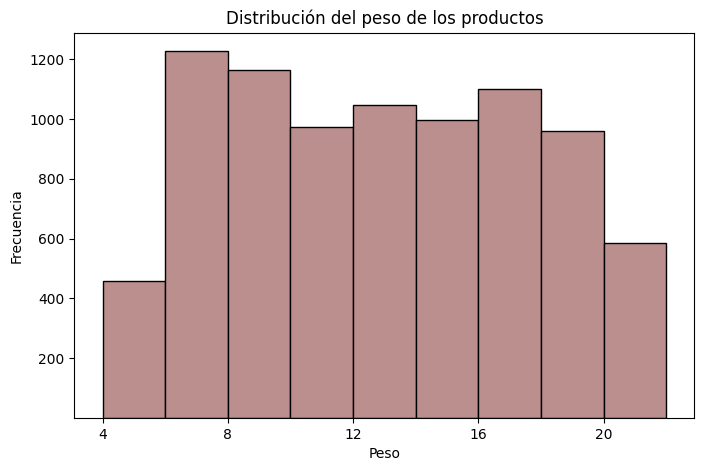

In [127]:
plt.subplots(figsize=(8, 5))
plt.hist(df2['Item_Weight'], bins=9, range=(4, 22), color="rosybrown", edgecolor="black");
plt.xticks(np.arange(4, 24, 4))
plt.yticks(np.arange(200, 1400, 200))
plt.xlabel("Peso");
plt.ylabel("Frecuencia");
plt.title("Distribución del peso de los productos");

##Gráfico de barras para comprender la distribución de los tipos de artículos

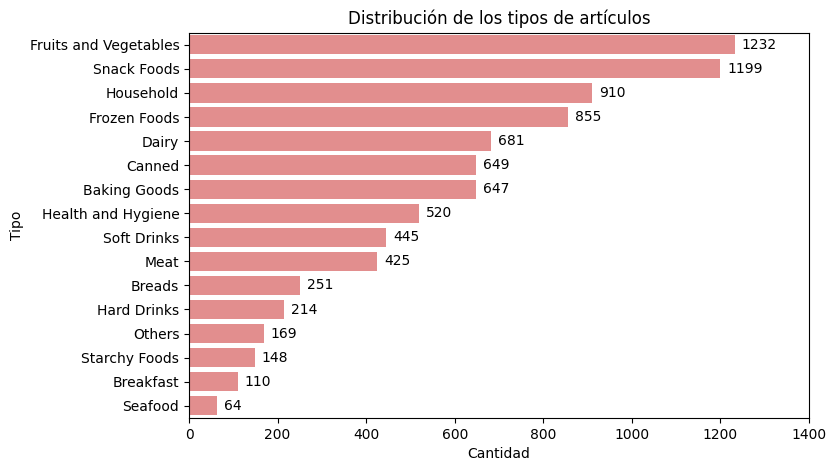

In [128]:
plt.subplots(figsize=(8, 5))
ax = sns.barplot(data, orient="h", color="lightcoral");
plt.xlabel("Cantidad");
plt.ylabel("Tipo");
plt.xticks(np.arange(0, 1600, 200));
for i in ax.containers:
    plt.bar_label(container=i, padding=5)
plt.title("Distribución de los tipos de artículos");

##Diagrama de dispersión para analizar la relación entre el peso de los productos y sus ventas

In [129]:
px.scatter(x=df2['Item_Weight'], y=df2['Item_Outlet_Sales'], color=df2['Outlet_Type'],
           title="Realación entre el peso de los productos y sus ventas",
           labels={
                     "x": "Peso",
                     "y": "Ventas",
                     "color": "Tipo de tienda"
                 },)

#Visualizaciones de Análisis Explicativo

##Gráfico de barras para comparar las ventas en diferentes tiendas

In [130]:
gb1 =df2.groupby("Outlet_Identifier")["Item_Outlet_Sales"].sum().round()
gb1

Outlet_Identifier
OUT010     188340.0
OUT013    2142664.0
OUT017    2167465.0
OUT018    1851823.0
OUT019     179574.0
OUT027    3444468.0
OUT035    2268123.0
OUT045    2036725.0
OUT046    2118395.0
OUT049    2183970.0
Name: Item_Outlet_Sales, dtype: float64

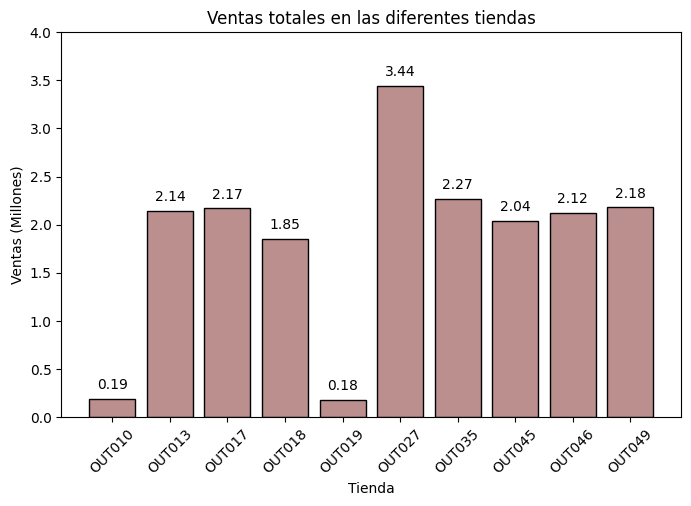

In [131]:
stores = list(gb1.index)
sales_store = list(gb1.values)
sales_store = list(map(lambda x: round(x / 1000000, 2), sales_store))

plt.subplots(figsize=(8, 5));
bar_container = plt.bar(stores, sales_store, color="rosybrown", edgecolor="black");
plt.xlabel("Tienda");
plt.ylabel("Ventas (Millones)");
plt.title("Ventas totales en las diferentes tiendas");
plt.xticks(rotation=45);
plt.bar_label(container=bar_container, padding=5);
plt.ylim(0, 4);

##Gráfico de dispersión para mostrar cómo varía la visibilidad de un producto en función de su precio

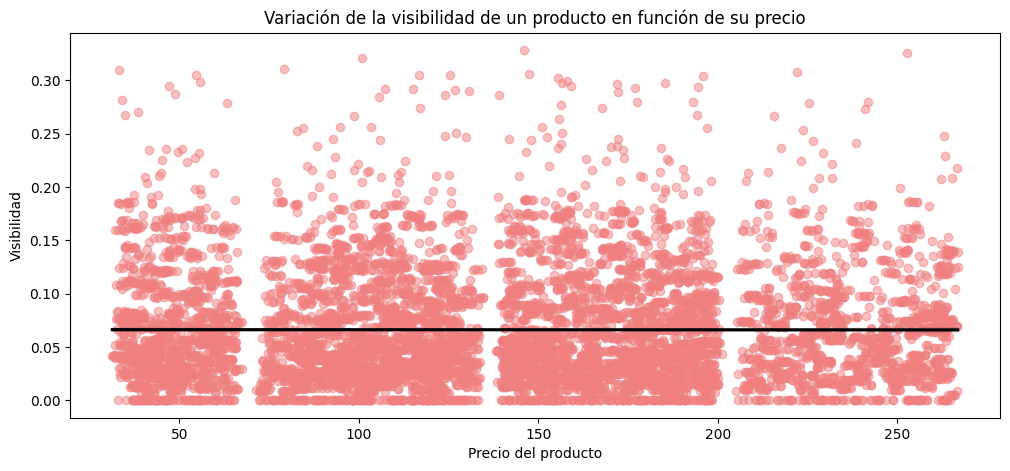

In [132]:
plt.subplots(figsize=(12, 5));
sns.regplot(data=df2, x="Item_MRP", y="Item_Visibility", scatter_kws = {"color": "lightcoral", "alpha": 0.5}, line_kws = {"color": "black"},);
plt.xlabel("Precio del producto");
plt.ylabel("Visibilidad");
plt.title("Variación de la visibilidad de un producto en función de su precio");

##Box plot para mostrar cómo varían las ventas del tipo de artículo "Fruits and Vegetables" en los diferentes tipos de tienda

In [136]:
filter_fruits_vegetables = df2["Item_Type"] == "Fruits and Vegetables"
df3 = df2.loc[filter_fruits_vegetables, :]

px.box(df3, x="Outlet_Type", y="Item_Outlet_Sales", labels={"Outlet_Type": "Tipo de tienda", "Item_Outlet_Sales": "Ventas"}, title='Ventas de "Fruits and Vegetables" en los diferentes tipos de tiendas')